In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm


df = pd.read_csv('data/hoteis.csv')

df.head()


,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


Correlaction

In [2]:
corr = df.corr()
corr["Preco"]

Estrelas              0.401099
ProximidadeTurismo   -0.697142
Capacidade            0.531866
Preco                 1.000000
Name: Preco, dtype: float64

First analysis with seaborn

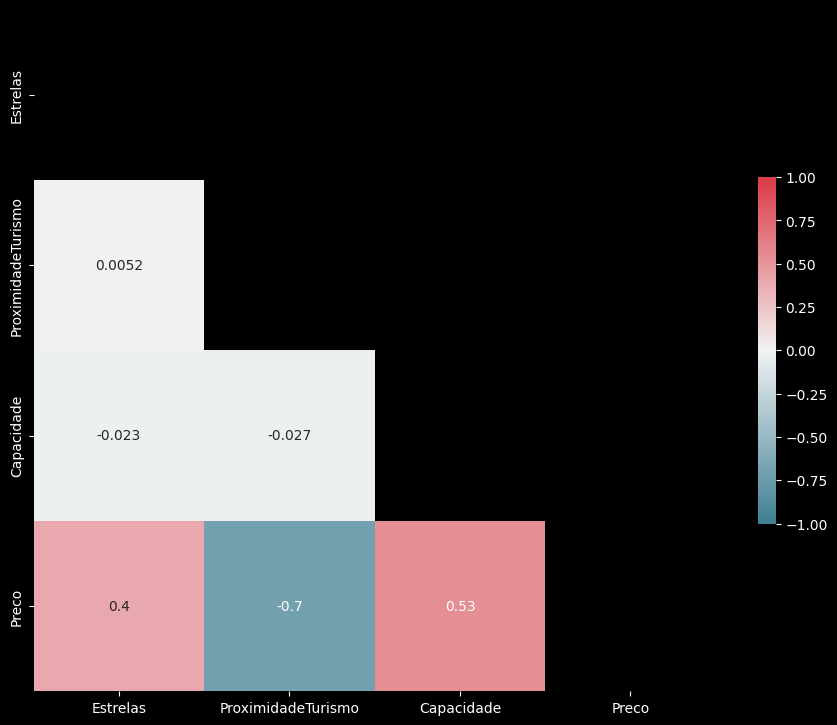

In [3]:
plt.style.use('dark_background')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0, annot=True, cbar_kws={"shrink": .5})

plt.show()

We can analyze that the proximity of tourists increases as the stars of the hotels also increase, but the capacity decreases as the stars increase. Capacity also decreases as proximityToTourism decreases.

In [4]:
px.scatter(df, x= "Preco", y = "ProximidadeTurismo", trendline_color_override="red", trendline="ols")

Now, we can see that as the ProximidadedeTurismo is higher, the price tends to decrease, and it tends to increase when it is lower.

# Now we can start with linear regression models.

We can use two models 

    - 1 = All the columns
    - 2 = Without the column "Estrelas"

In [5]:
y = df["Preco"]

x = df.drop(columns="Preco")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=573)

In [6]:
model01 = sm.OLS(y_train, 
                  x_train[["Estrelas", "ProximidadeTurismo", "Capacidade"]]).fit()

In [7]:
model02 = sm.OLS(y_train,
                 x_train[["ProximidadeTurismo", "Capacidade"]]).fit()

Now the resumes

In [8]:
print(model01.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Preco   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              9139.
Date:                Fri, 11 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:38:57   Log-Likelihood:                         -4564.6
No. Observations:                 800   AIC:                                      9135.
Df Residuals:                     797   BIC:                                      9149.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [9]:
print(model02.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  Preco   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              2904.
Date:                Fri, 11 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:38:57   Log-Likelihood:                         -5145.8
No. Observations:                 800   AIC:                                  1.030e+04
Df Residuals:                     798   BIC:                                  1.030e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Comparing the models (R2)

In [10]:
print(f"R2 model 01 -> {model01.rsquared}")
print(f"R2 model 02 -> {model02.rsquared}")

R2 model 01 -> 0.9717525401957385
R2 model 02 -> 0.879214251472304
